# **Introduction**

The data is from Numbeo - Cost of Living for 2022.

Source: https://www.numbeo.com/cost-of-living/rankings_by_country.jsp

I found the data on Kaggle and was able to find the source above from which it originated. The data is from a report done which analyzed 139 countries cost of living index. Components which are associated with the cost of living index include the rent index, cost of living plus rent index, groceries index, restaurant price index, and local purchasing power index within each of the countries explored. The indices are relative to New York City. New York represents 100% for the index. Above 100% shows the average for a country is more than New York City by the amount it differs from 100%. Below 100% means the index is the diffence less than the index of new York City.

**Indices**:
 Cost of Living index incates consumor goods prices including groceries, restaurants,transportation and utilities. This excludes rent or mortgage. Rent index estimates the prices of renting apartments. Groceries Index estimates the groceries prices. Restaurant index compare prices of meals and drinks in restaurants and bars. Cost of living plus rent index estimates consumer goods and rent prices. Local purchasing power represents the relative purchasing power in buying goods and services in a given region for the average net salary there.
 
Indices source: https://www.numbeo.com/cost-of-living/cpi_explained.jsp

# **Data Pre-processing**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# input cost of living data


In [2]:
#load dataframe
#header=[1] needed to shift frame up
df = pd.read_csv('./Cost_of_Living_Index_2022.csv',header=[1])
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [3]:
df=df.drop(columns=['Rank'])
#orders countries in alphabetical order

In [4]:
df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...
134,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [5]:
#this will take the mean of each column (this computation ignores the currently present nan values (not a number)), then round, and return a dataframe indexed by the columns of the original dataframe.
#error because country is not numerical
df.mean().round()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_20464\2441922926.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().round()


Cost of Living Index              50.0
Rent Index                        19.0
Cost of Living Plus Rent Index    36.0
Groceries Index                   47.0
Restaurant Price Index            43.0
Local Purchasing Power Index      46.0
dtype: float64

In [6]:
df.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         139 non-null    object 
 1   Cost of Living Index            139 non-null    float64
 2   Rent Index                      139 non-null    float64
 3   Cost of Living Plus Rent Index  139 non-null    float64
 4   Groceries Index                 139 non-null    float64
 5   Restaurant Price Index          139 non-null    float64
 6   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.7+ KB


In [8]:
df.shape

(139, 7)

# **Model Setup**

In [9]:
#importing matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


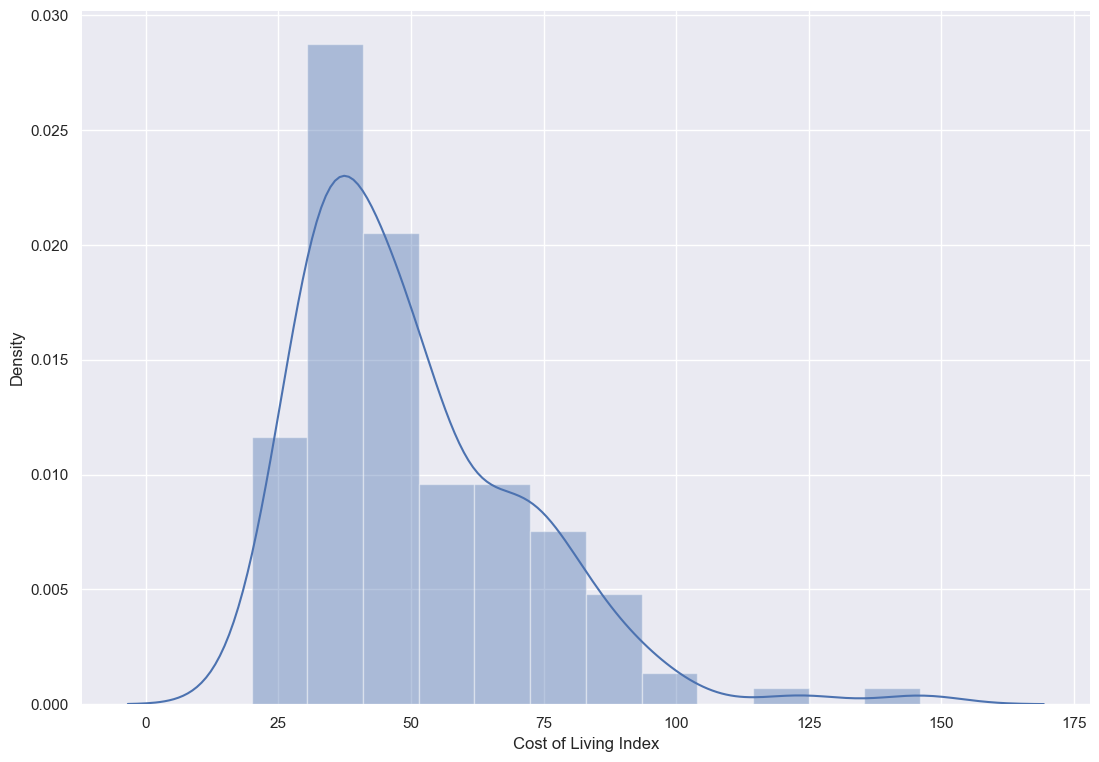

In [10]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.distplot(df['Cost of Living Index'])

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


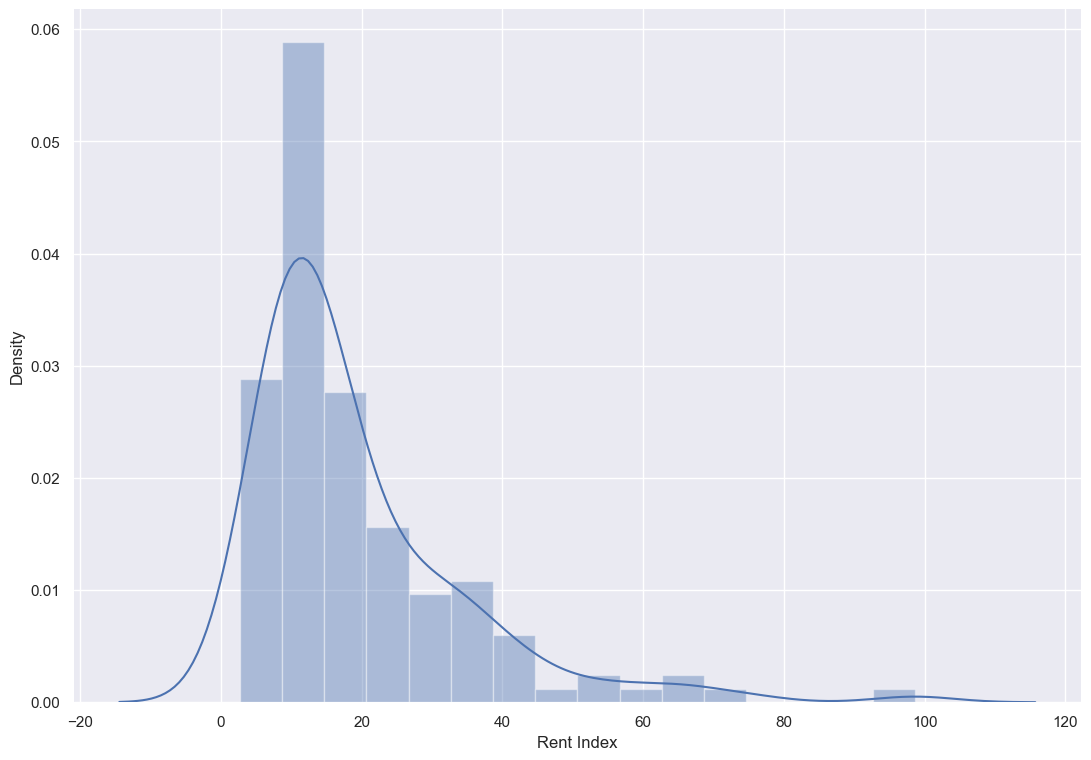

In [11]:
#create plot, a histogram of Rent Index 
setPlt()
hist = sns.distplot(df['Rent Index'])

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


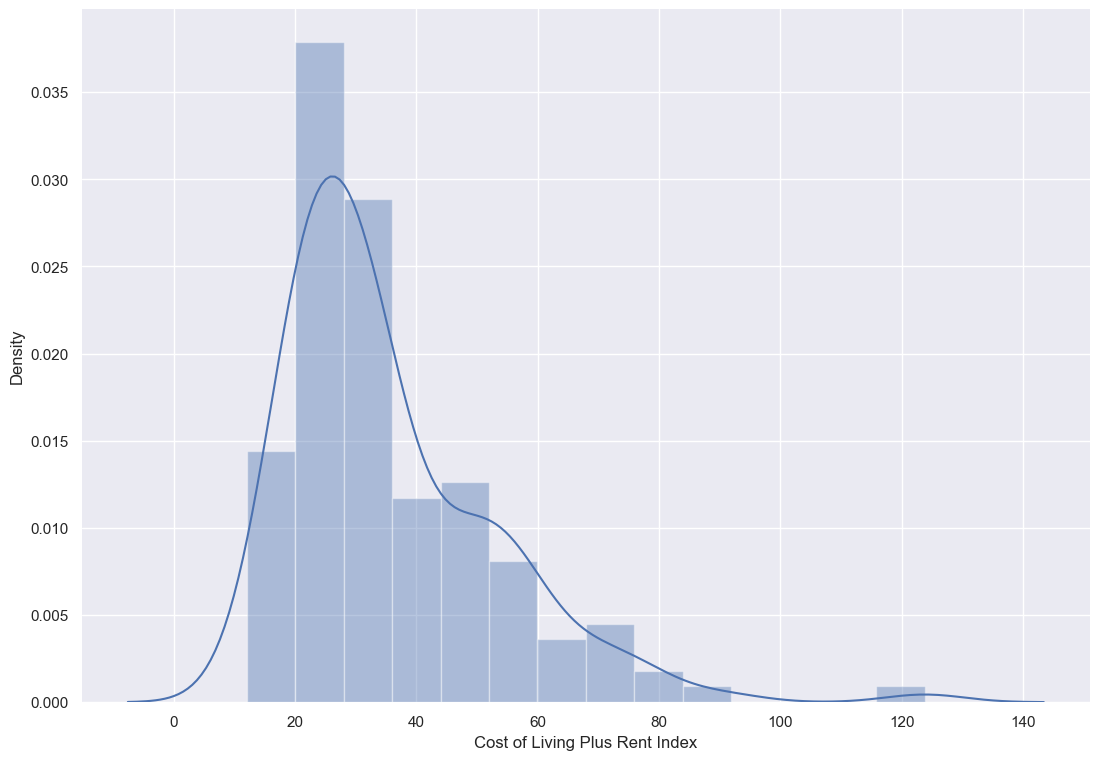

In [12]:
#create plot, a histogram of Cost of Living Plus Rent Index
setPlt()
hist = sns.distplot(df['Cost of Living Plus Rent Index'])


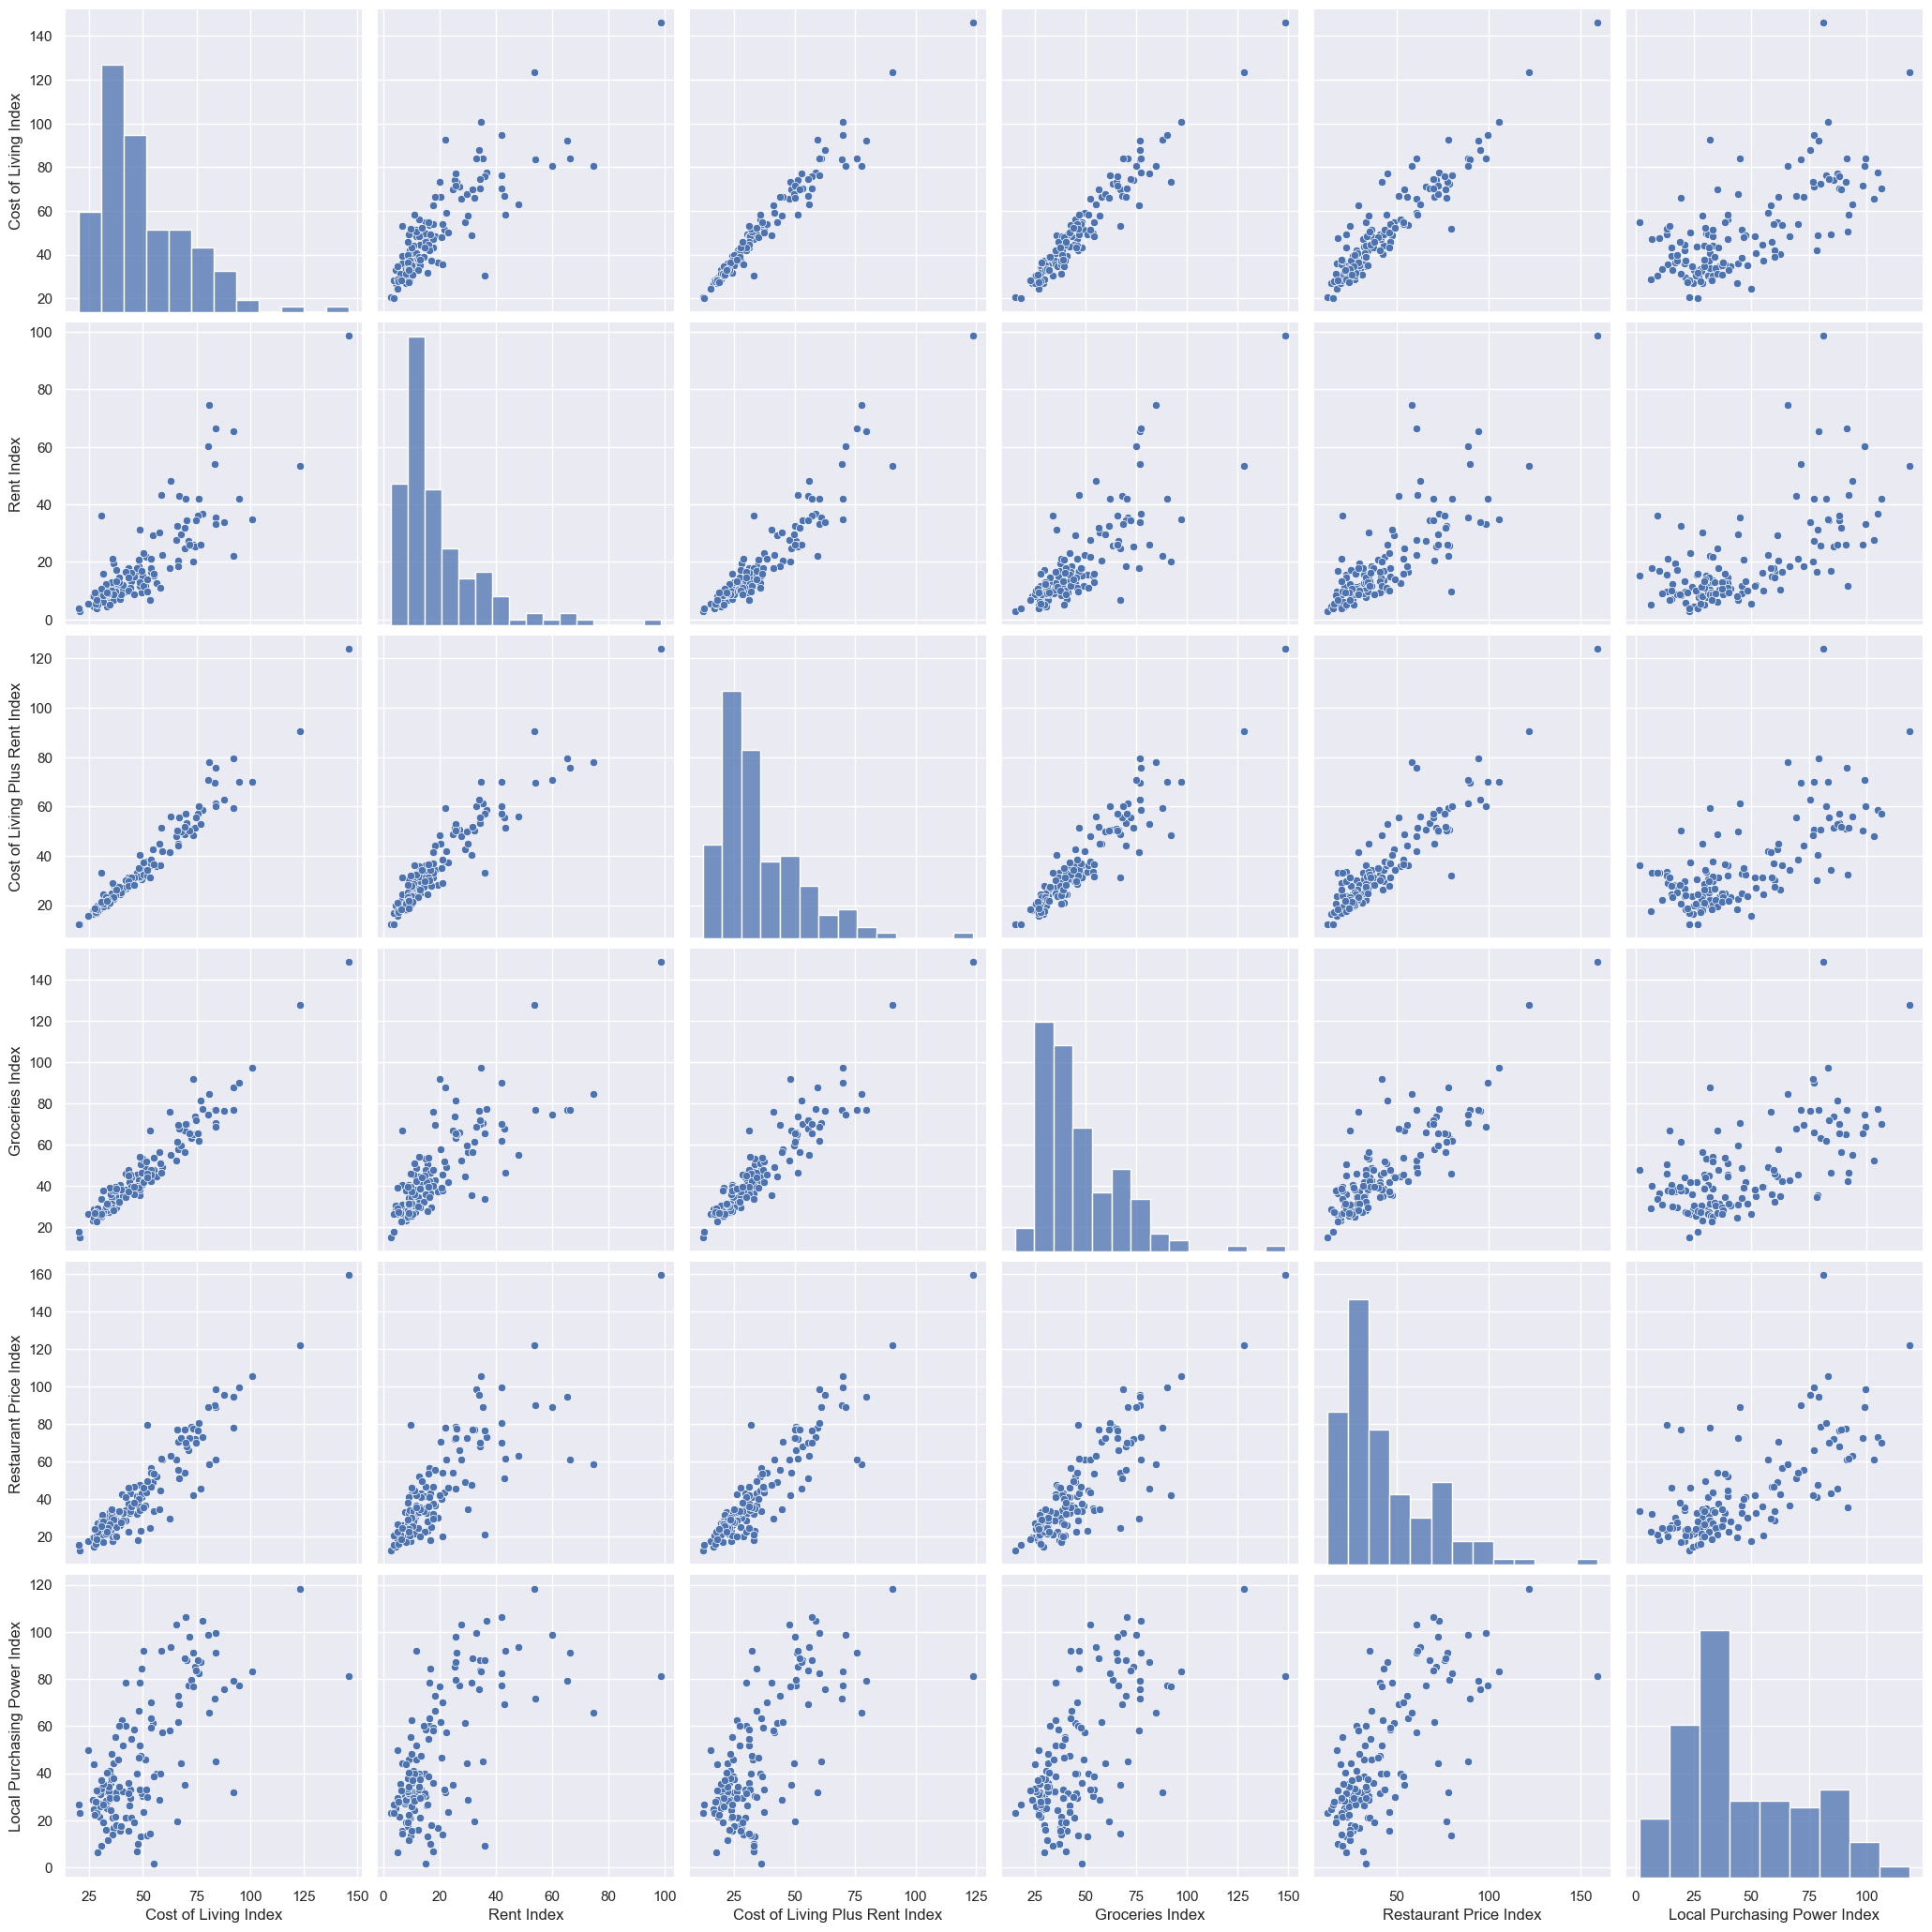

In [13]:
#plot all columns against each other except country
import seaborn as sns; sns.set()

sns.pairplot(data=df,
             x_vars=['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index'],
             y_vars= ['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index'],
              height=3.5)

# Linear Regression Model

In [14]:
#linear regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#drop country to keep numerical data and Cost of Living Plus Rent Index to set Cost of Living Plus Rent Index as Y 
df = df.drop(columns=["Cost of Living Plus Rent Index"])
X = df.drop(columns=['Country','Cost of Living Index'])
y = df['Cost of Living Index'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# print(X_test.values)
model1 = LinearRegression()
model1.fit(X_train.values, y_train.values)

def mse(model, X, y):
    y_hat = model1.predict(X_train.values)
    err = np.mean((y_train.values - y_hat)**2)
    return err

print('Score(R^2):', model1.score(X_test.values, y_test.values))
print("MSE:", mse(model1, X_test, y_test))
print(model1.predict(np.array([[2, 11, 10, 25]]))) #use this to take input from user and predict the COI

Score(R^2): 0.9517963180815594
MSE: 8.466250552313197
[17.06337163]


In [15]:
import pickle
with open("cost_of_living_index.pickle", "wb") as f:
    pickle.dump(model1, f)

In [16]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [17]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

res = cross_val_score(model1, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model1, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.9729326630838943 c-v MSE: 8.466250552313197


**Results**:
I found a relatively high R^2 value for both linear regressions. I first look into Cost of Living Plus Rent Index compared to the other indices and found an R^2 of 0.9999. This was very high so I created a regression model looking into groceries index as the dependent variable. This gave a slightly lower R^2 value but still was above 0.9. The MSE was also slightly higher. I believe this to be due to the correlation of the indices. The Cost of Living Plus Rent Index is similar to two other indices measured separately. Grocerices is further separated but still highly correlated to the other indices.


# **Discussion**

I found the data to work well as it was mostly numerical except for the country column. I enjoy looking into pairplots and visualizing data to see the trends and correlating present. This data was clean and allowed me to do so with ease. I struggled in the beginning as I overlooked a column of Rank. I thought rank was ranking the cost of living index by country, but it was alphabetically ranking the data. This resulted in my models containing poor projections resulting in low R^2 values which even reached negative values. Upon finally realizing the ranks true role, I was able to drop this column and compared the measured indices to properly model the data. In the future, I hope to look into data contain various data types and images for further model exploration. The lack of complexity of the data set I chose allowed me to effectively understand the processes used and find errors quickly, but also limited my ability to explore othe models. I also found a great resource in Kaggle and look forward to looking into other datasets and using Kaggle in the future.